# Taller de Interpolación


$f : \mathbb{R} \rightarrow \mathbb{R}$

$\{(x_0,f(x_0)),\ \dots,\ (x_n,f(x_n))\}$, con $x_i \neq x_j \ \forall \ i\neq j$
  
  
Interpolar consiste en hallar una función $\Phi$ tal que $\Phi(x_i) = f(x_i) \ \ \forall i$

##### Interpolar usando un polinomio $p$ 

($p =\Phi$)

Existe un único polinomio $p$ de grado menor o igual que $n$ tal que $p(x_i)=f(x_i)$ para todo $i$
   
* Lagrange

 $$ p(x) = f(x_0) L_0(x) \ +\  \dots\  +\ f(x_n) L_n(x), \ \ \ \ \text{ con } \ L_k(x) = \prod_{i=0, i\neq k}^{n} \frac{(x-x_i)}{(x_k-x_i)}$$
 
 
* Diferencias divididas (Newton)

$$p(x) = f[x_0] + f[x_0, x_1] (x-x_0) + \ \dots\  + f[x_0,\ \dots,\ x_n] (x-x_0)\ \dots\  (x-x_{n-1})$$

$$
\left\{ \begin{array}{ll}
      f[x_i] & = f(x_i) \\
      f[x_i,\ \dots,\ x_{i+k}] & = \frac{f[x_{i+1},\ \dots,\ x_{i+k}] - f[x_i,\ \dots,\ x_{i+k-1}]}{x_{i+k} - x_i} \end{array} \right.
$$


*  Matriz de Van der Monde

$$p_n(x) = a_0 + a_1x+ \cdots + a_n x^n$$

y se buscan $a_0, ..., a_n$ tales que

$$p_n(x_j) = y_j$$

$$
\begin{bmatrix}1&x_{1}&x_{1}^{2}&\dots &x_{1}^{n}\\1&x_{2}&x_{2}^{2}&\dots &x_{2}^{n}\\1&x_{3}&x_{3}^{2}&\dots &x_{3}^{n}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x_{n}&x_{n}^{2}&\dots &x_{n}^{n}\end{bmatrix}\begin{bmatrix}a_{0}\\a_{1}\\a_{2}\\\vdots \\a_{n}\end{bmatrix} = 
\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots \\y_{n}\end{bmatrix} 
$$


## Implementación polinómio de interpolación

**Ejercicio 1:** Implementar los métodos de Lagrange, diferencias divididas (Newton) y Van der Monde para obtener el polinomio interpolador. Medir los tiempos de ejecución dependiendo de la cantidad de puntos.

Se puede usar la clase poly1d de numpy para facilitar las operaciones ente polinomios y el método de resolución de sistema de equaciones lineales np.linalg.solve.

In [3]:
def lagrange(x, y):
    """
    Devuelve el polinomio interpolador con el métodos de lagrange
    """
    
    return p

def newton(x, y):
    """
    Devuelve el polinomio interpolador con el método de diferencias divididas
    """
    
    return p

def vandermonde(x,y):
    """
    Devuelve el polinomio interpolador con el método de van der monde
    """
    
    return p

Clase poly1d de numpy

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(np.poly1d([1,-0.5,2]))

   2
1 x - 0.5 x + 2


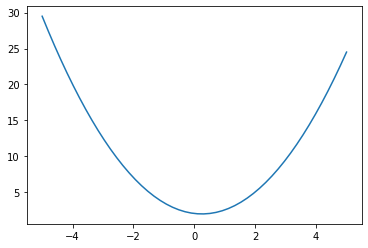

In [6]:
p = np.poly1d([1,-0.5,2])
x = np.linspace(-5,5,50)
plt.plot(x,p(x));

### Qué método es más rápido?

In [6]:
x = np.linspace(-5,5,8)
y = x**3 - 2*x**2 + 3*x - 0.5  

In [7]:
%%timeit
newton(x,y)

76.5 ns ± 2.46 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [8]:
%%timeit
lagrange(x,y)

74.1 ns ± 5.53 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [9]:
%%timeit
vandermonde(x,y)

73.5 ns ± 5.47 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Oscilaciones del polinomio interpolador

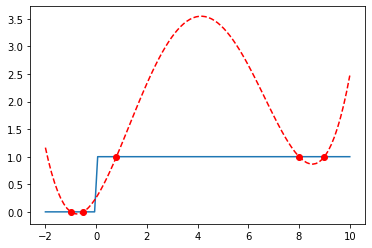

In [10]:
from scipy.interpolate import lagrange as lagrange_scipy
x = np.array([-1,-0.5,0.8,8,9])
xs = np.linspace(-2,10,100)
fn = lambda x: np.int32(x>0)
y = fn(x)

yp = lagrange_scipy(x,y)(xs)

plt.plot(xs,fn(xs));
plt.plot(x,fn(x),'or');
plt.plot(xs,yp,'--r');

In [25]:
%%HTML
<iframe width="620" height="460" src="https://editor.p5js.org/pabloriera/full/9UqjrRu3k"></iframe>

# Comparación métodos de interpolación

**Ejercicio 2:** A partir de un conjunto de funciones de prueba, comparar los errores de los siguientes métodos de interpoalción

* Polinomio interpolador
* Valor más cercano
* Spline Lineal
* Spline Cuadrático
* Spline Cúbico

Error cuadrático medio entre función original y interpolación

$$ ECM = \sum_x (f(x)-\hat{f}(x))^2),\quad x \in [x_0,x_n]$$

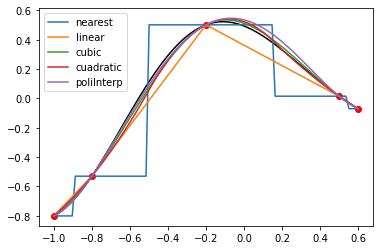

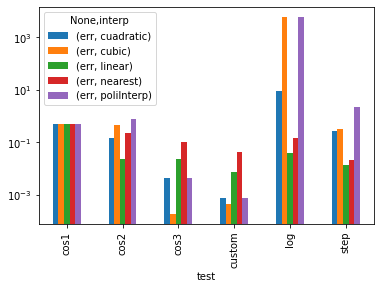

In [12]:
tests = [
 {'name':'step', 'x':[-1,-0.5,0.8,8,9], 'y': lambda x: np.int32(x>0)},
 {'name':'cos1', 'x':[-0.75,-0.25,0.25,0.75], 'y': lambda x: np.cos(2*np.pi*x)},
 {'name':'cos2', 'x':[-1.0,-0.5,0,0.5,1.0], 'y': lambda x: np.cos(2*np.pi*x)},
 {'name':'cos3', 'x':[-1.0,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0], 'y': lambda x: np.cos(2*np.pi*x)},
 {'name':'log', 'x':[0.1,1.0,10.0,100.0], 'y': lambda x: np.log10(x)},
 {'name':'custom', 'x':[-1.0,-0.8,-0.2,0.5,0.6], 'y': lambda x:  0.8*np.cos(2*np.pi*x*0.5-0.5) + 0.5*np.cos(2*np.pi*x*0.6+2)},
 ]

# Interpolación de imágenes

In [17]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [37]:
!wget https://www.dropbox.com/s/0nxyr3epgtg20bl/messi.png -O messi.png

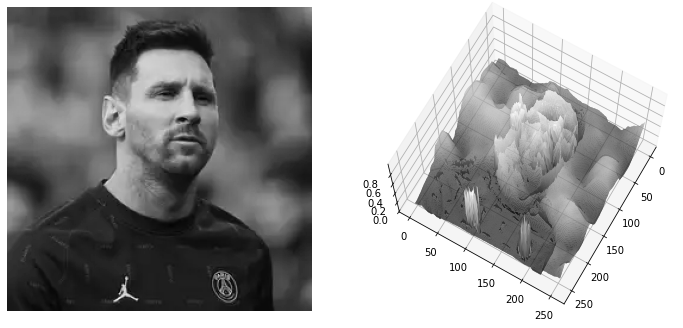

In [50]:
from mpl_toolkits.mplot3d import Axes3D

I = rgb2gray(plt.imread('messi.png'))
xx, yy = np.mgrid[0:I.shape[0], 0:I.shape[1]]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, projection='3d')

ax1.imshow(I,cmap='gray')
ax1.axis('off')
ax2.plot_surface(xx, yy, I ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)
ax2.view_init(elev=70., azim=30)

## Vecino más cercano

Cada pixel de la imagen original es copiado en sus vecinos

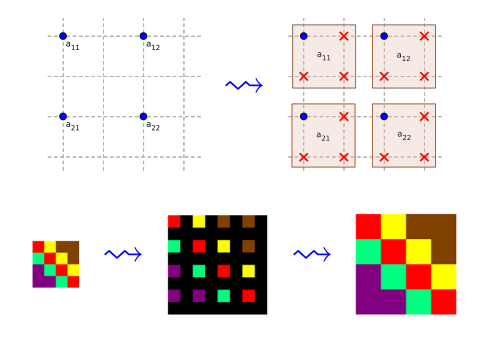

## Con función interpoladora

Para cada fila de la imagen, construimos una función interpoladora $\Phi_{\tilde{y}}(x)$ para la función $f(x,\tilde{y})$, con $\tilde{y}$ fijo y hallamos los valores de los píxeles intermedios

Luego para cada columna de la imagen (incluso las columnas interpoladas previamente), calculamos la función interpoladora $\Phi_{\tilde{x}}(y)$ para la función $f(\tilde{x}, y)$ e interpolamos en los píxeles intermedios

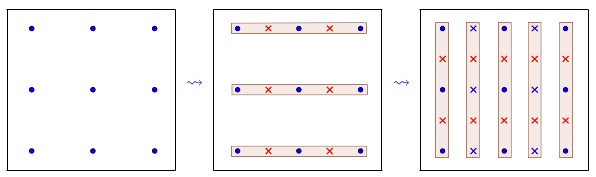

## Aliasing

Las muestra de una señal pueden provenir de más de una función

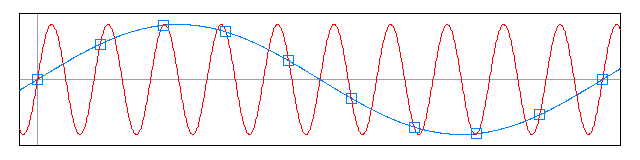

In [26]:
%%HTML
<iframe width="620" height="620"  src="https://editor.p5js.org/pabloriera/full/KPdIauzrU"></iframe>

Aliasing al cambiar el tamaño de una imagen

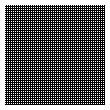

In [11]:
size = 100
dpi = 50
I = np.zeros((size,size,3))
I[::2,::2] = 1
# I[:,::2] = 0

fig = plt.figure(dpi=dpi)
fig.set_size_inches(I.shape[1]/dpi, I.shape[0]/dpi)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(I, interpolation='nearest')
fig.savefig('figure.png', dpi=dpi)

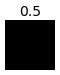

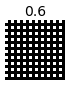

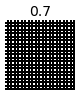

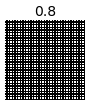

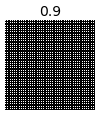

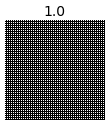

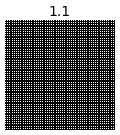

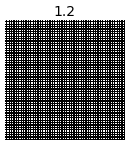

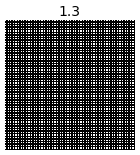

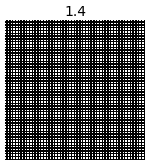

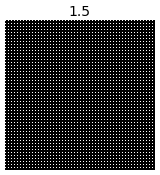

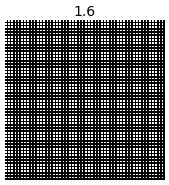

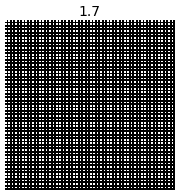

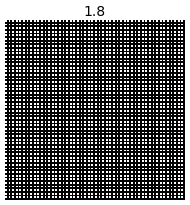

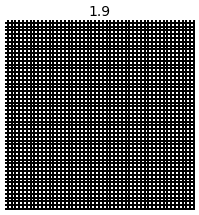

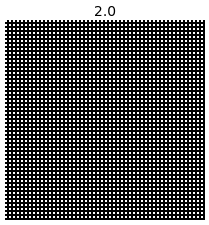

In [15]:
def draw(I, size_factor, dpi, **kwargs):
    fig = plt.figure(dpi=dpi)
    fig.set_size_inches(I.shape[1]/dpi*size_factor, I.shape[0]/dpi*size_factor)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(I, **kwargs)
    return fig
for sf in np.arange(0.5,2.1,0.1):
    draw(I,sf,dpi, cmap='gray', interpolation='none')
    plt.title(np.around(sf,2),fontdict={'size':20})

Si interpolamos no tenemos aliasing

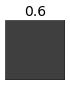

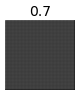

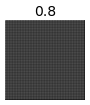

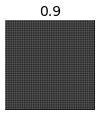

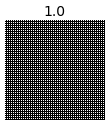

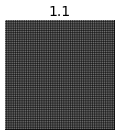

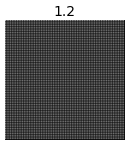

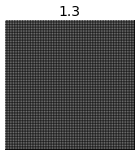

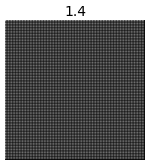

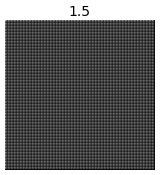

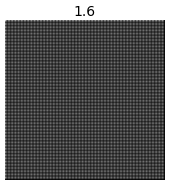

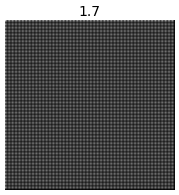

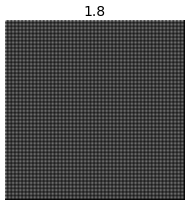

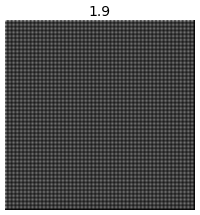

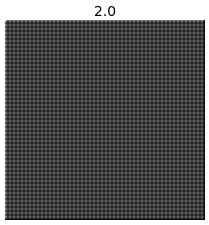

In [13]:
for sf in np.arange(0.6,2.1,0.1):
    draw(I,sf,dpi, cmap='gray', interpolation='bicubic')
    plt.title(np.around(sf,2),fontdict={'size':20})

Usemos una imagen más realista

In [ ]:
!wget https://www.dropbox.com/s/hjuggfgm4nhwtz6/zebra2.jpg -O zebra2.jpg

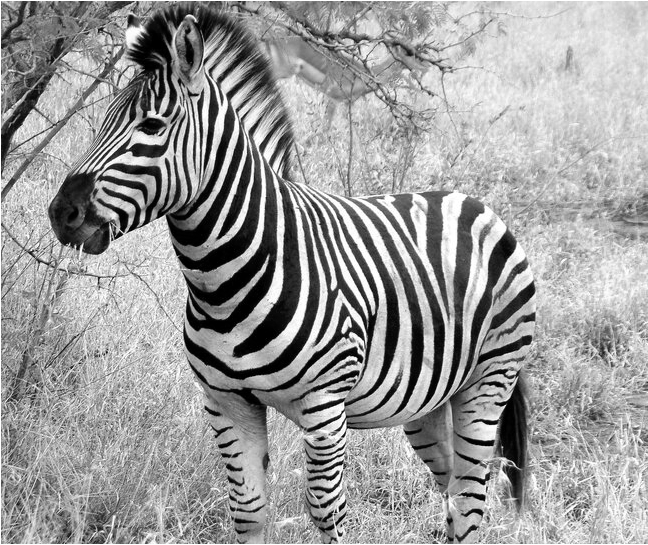

In [226]:
I = plt.imread('zebra2.jpg')
I = rgb2gray(I).astype('uint8')
draw(I,1,dpi=10,interpolation='none', cmap='gray');

Imagen _downsampleada_ con un factor 2.

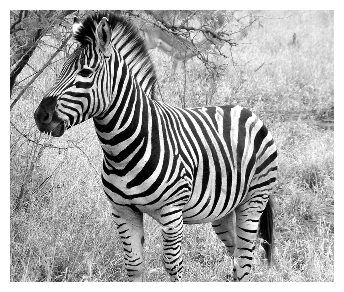

In [227]:
factor = 2
I_downsampled = I[::factor,::factor]
draw(I_downsampled,1, 100, interpolation='none', cmap='gray');

Qué pasa si no se interpolar y vuelvo a la resolución original y relleno los puntos que faltan con el valor medio de la imagen

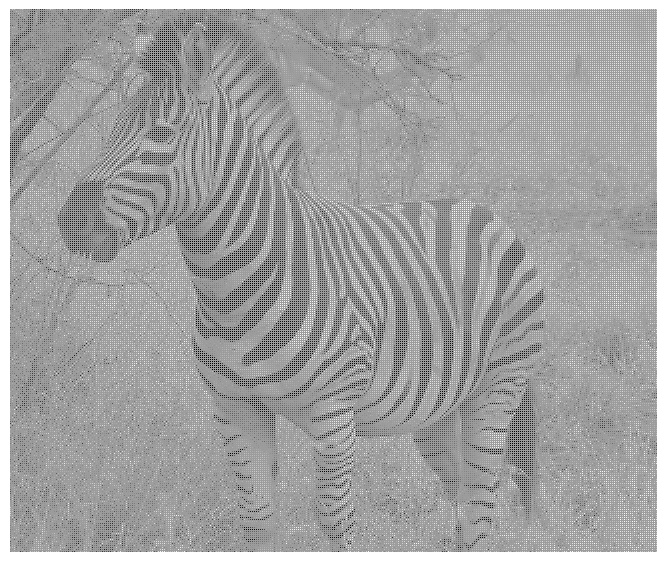

In [228]:
I_conmean = np.ones_like(I)*np.mean(I2)
I_conmean[::factor,::factor] = I_downsampled
draw(I_conmean,1, 100, interpolation='none', cmap='gray');

**Ejercicio 3:** Implementar una función para interpolar imágenes primero por filas y luego por columnas usando la función _interp1d_ de scipy. Comparar el error de los tipos de interpolación lineal, cúbico y de vecinos. Buscar imágenes en internet (cuidado con el tamaño de las imágenes) que tengan un menor error para cada tipo.

In [230]:
import numpy as np
from scipy.interpolate import interp1d
# el kind de nuestra función va de la mano con el kind de interp1d.
def interpolate_image(img, factor=2, kind='linear'):
    
    height = img.shape[0]
    width = img.shape[1]

    img_interp = np.zeros(((height-1) * factor+1, 
                           (width-1) * factor+1))
    
    # Copiamos los pixeles originales adecuadamente
    # Recordar [start:stop:step, start:stop:step]
    img_interp[::factor, ::factor] = img

    for i in range(height):
        """
        Interpolación por filas:
        
        Escribir código acá
        """
        
    # Hasta acá no tiene que haber ninguna fila múltiplo de factor con norma 0
    assert(all(not np.isclose(np.linalg.norm(img_interp[i]), 0) for i in range(0, img_interp.shape[0], factor)))
   
    # Todas las que no son múltiplo de factor tienen que tener norma 0
    assert(all(np.isclose(np.linalg.norm(img_interp[i]), 0) for i in range(0, img_interp.shape[0]) if i % factor != 0))

    for j in range(img_interp.shape[1]):        
        """
        Interpolación por columnas
        
        
        Escribir código acá
        """
        
        ## Clippeo valores fuera de 0 y 255
        img_interp = np.maximum(img_interp, 0)
        img_interp = np.minimum(img_interp, 255)
    
    return np.around(img_interp).astype('uint8')

In [244]:
I_interpolada = interpolate_image(I_downsampled,2, kind='linear')

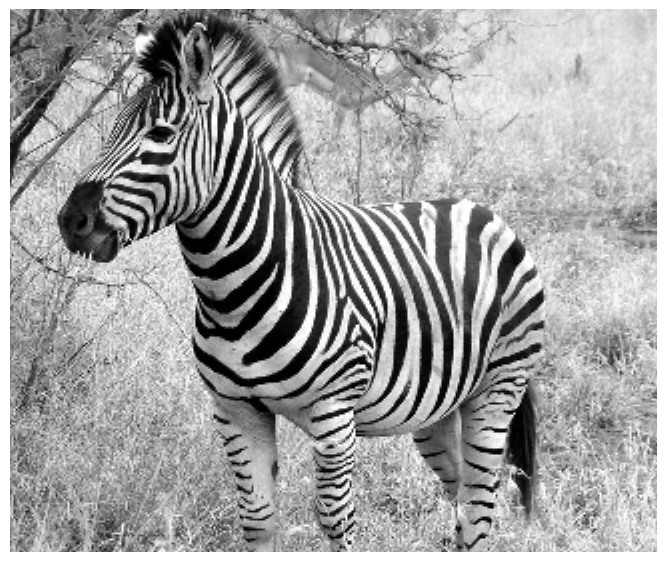

In [245]:
draw(I_interpolada,1,100, interpolation='none', cmap='gray');

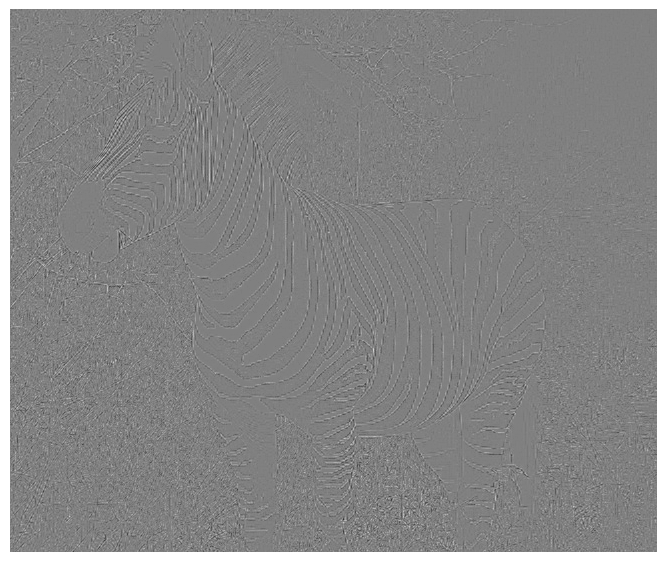

In [246]:
draw(I_interpolada.astype(float)-I.astype(float),1,100, interpolation='none', cmap='gray', vmin=-255, vmax=255);

Calculamos el error

In [247]:
def ecm(img1, img2):
    return np.mean( (img1.astype('float') - img2.astype('float')) ** 2 )

In [248]:
ecm(I_interpolada,I)

352.7111473552677

Probamos otro método de interpolación

887.3445623802733

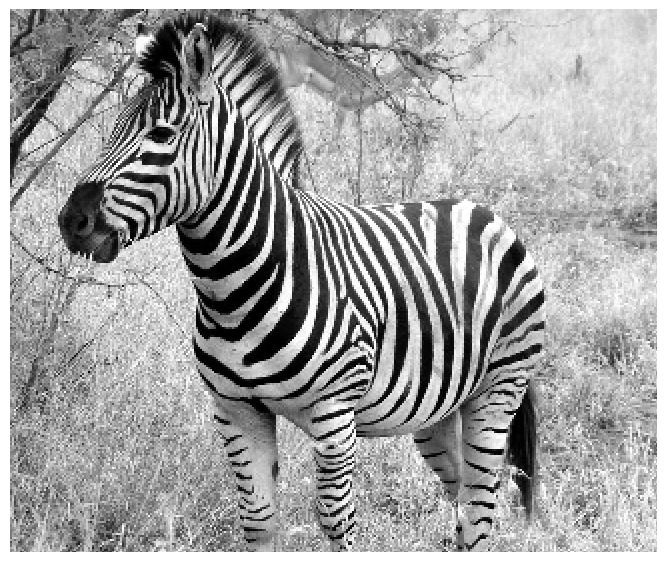

In [250]:
I_interpolada = interpolate_image(I_downsampled, 2, kind='nearest')
draw(I_interpolada,1,100, interpolation='none', cmap='gray');
ecm(I_interpolada,I)